# Review of exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
fileName = "../data/shortRaw.npy" # binder users or people with a local git repository
dat = np.load(fileName)

* How many dimensions does the data have?
* What is the size of the array in each dimension?
* What is the data type or dtype (integer, float, etc.) of the `dat` array?
* Which dimension represents the recording channels and the recording samples?

In [2]:
print("ndim:",dat.ndim)
print("shape:",dat.shape)
print("dtype:",dat.dtype)

ndim: 2
shape: (8, 20000)
dtype: int16


* Plot the data for the first recording channel.
* Do you seen any oscillatory patterns in the data? If so at which frequency? 
* Plot the data for 2 recording channels. 
* What is similar or different between the different channels?

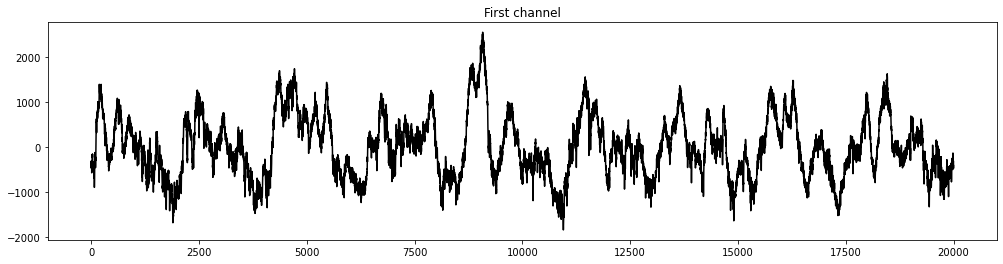

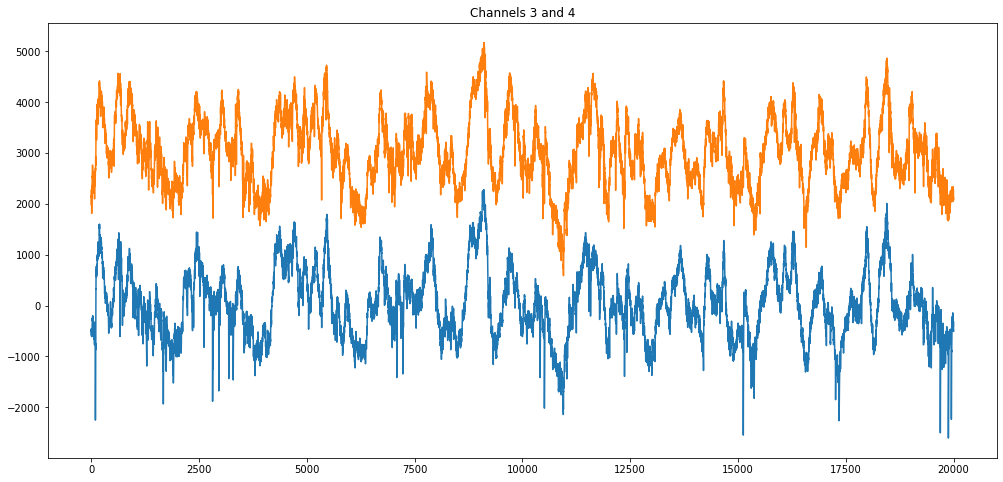

In [3]:
# plot the first channel
plt.figure(figsize=(17,4))
plt.plot(dat[0,:],c="black")
plt.title("First channel")
plt.show()

# plot 2 channels
plt.figure(figsize=(17,8))
plt.plot(dat[3,:])
plt.plot(dat[4,:]+3000) # I added 3000 to the values of channel 4 to be able to see it.
plt.title("Channels 3 and 4")
plt.show()

* What is the mean value in the `dat` array?
* What is the mean value per channel of the `dat` array?

In [4]:
print("The mean of dat is :",dat.mean())
print("Mean per channel:")
print(dat.mean(axis=1))

The mean of dat is : 3.06385
Mean per channel:
[ -9.30035  18.965   -14.9138   28.8605   16.56955  29.91675 -33.8044
 -11.78245]


* Can you plot the mean value across channels for all samples? The plot should have 20000 values.


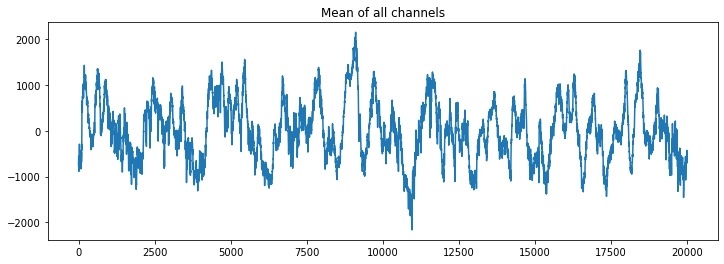

In [5]:
plt.figure(figsize=(12,4))
plt.plot(dat.mean(axis=0))
plt.title("Mean of all channels")
plt.show()

* How could I add 100 to all values in the array?

In [6]:
newDat = dat+100

-"I hate the idea of broadcasting. Can I do this with a for loops?"

-"Sure, but it will be longer to code."

In [7]:
newDatFor = np.empty_like(dat) # create an empty array for the results
for i in range(dat.shape[0]):
    for j in range(dat.shape[1]):
        newDatFor[i,j] = dat[i,j]+100

Test if the two approaches give the same results.

In [8]:
np.array_equal(newDat,newDatFor)

True

Let's see which approach (broadcasting Vs. for loops) is the fastest.

In [9]:
%%time
newDat = dat+100

CPU times: user 87 µs, sys: 6 µs, total: 93 µs
Wall time: 97 µs


In [10]:
%%time
newDat = np.empty_like(dat) # create an empty array for the results
for i in range(dat.shape[0]):
    for j in range(dat.shape[1]):
        newDat[i,j] = dat[i,j]+100

CPU times: user 269 ms, sys: 24 µs, total: 269 ms
Wall time: 269 ms


In this case, broadcasting is approximately 500-1000 times slower.

**Broadcasting saves you time when writing and running the code.**

* Which channel has the largest standard deviation?

In [11]:
print("Standard deviation per channel:")
print(dat.std(axis=1))
print("Channel with the largest standard deviation")
print(np.argmax(dat.std(axis=1))) # note the use of np.argmax()

Standard deviation per channel:
[676.37638925 676.71487369 682.68302745 669.85032936 688.10030647
 641.68837049 673.63273573 651.19369954]
Channel with the largest standard deviation
4


* Can you plot the distribution of values for the second recording channel?

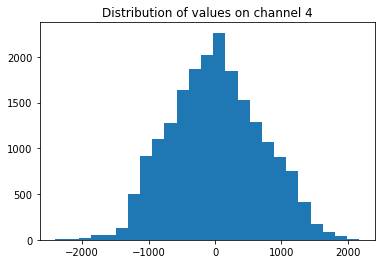

In [12]:
plt.hist(dat[4,:],bins=25)
plt.title("Distribution of values on channel 4")
plt.show()

* For each channel, remove the mean from every data point.

This can be solved with broadcasting. We get the 8 means (one per channel), and for each channel, we remove its respective mean from the row.

In [13]:
dat.shape, dat.mean(axis=1).shape

((8, 20000), (8,))

Given the shape of our 2 arrays above, can we use broadcasting to remove the mean from each individual channel?

Do you remember how to determine if two arrays are compatible for broadcasting?

In [14]:
#dat-dat.mean(axis=1)

We need to make the 2 arrays compatible for broadcasting first.

In [15]:
myMeans = np.expand_dims(dat.mean(axis=1),1)
myMeans.shape

(8, 1)

In [16]:
zeroed_dat = dat-np.expand_dims(dat.mean(axis=1),1)

In [17]:
zeroed_dat.mean(axis=1)

array([-1.10594556e-13, -1.16415322e-14,  1.74622983e-14,  0.00000000e+00,
       -3.49245965e-14, -5.23868948e-14,  1.01863407e-13,  3.78349796e-14])

# Filtering exercises

Luckily, the sosfiltfilt() function can take 2D arrays as input, so we can filter 8 channels with one line.

In [18]:
y = sosfiltfilt(myFilter, dat) # the sosfilt() function can take a 2D array and will filter every row separately
y.shape # y now contains our 8 channels

NameError: name 'sosfiltfilt' is not defined

# Detection

Calcluate the mean and standard deviation of 1 channel

In [ ]:
chan=3 # select a channel to work with
mean=y[chan,:].mean()
std=y[chan,:].std()
print("mean:",mean)
print("std:",std)

Calculate the detection threshold

In [ ]:
z=5 # 5 std below the mean
threshold = mean-std*z
print("threshold:",threshold)